In [ ]:
from stable_baselines3 import TD3, SAC
from stable_baselines3.common.noise import NormalActionNoise

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import gymnasium as gym

from CSTR_model_plus import CSTRRLEnv


2025-03-11 11:23:49.842334: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 11:23:49.859188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741717429.879686 2834530 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741717429.886012 2834530 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 11:23:49.907346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Pretraining using historical data...
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Pretrained with historical best PID gains. Reward: -11.637148208385534
Starting CIRL-PSO training...


  0%|          | 0/100 [00:00<?, ?it/s]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

  1%|          | 1/100 [00:02<04:14,  2.57s/it]

Iteration 1/100: Best Score = -0.2712, Mean Score = -3.9985
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at s

  2%|▏         | 2/100 [00:06<05:02,  3.09s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

  3%|▎         | 3/100 [00:11<06:40,  4.13s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

  4%|▍         | 4/100 [00:15<06:52,  4.29s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

  5%|▌         | 5/100 [00:19<06:38,  4.19s/it]

Iteration 5/100: Best Score = -0.0546, Mean Score = -4.9079
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at s

  6%|▌         | 6/100 [00:23<06:24,  4.09s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

  7%|▋         | 7/100 [00:27<06:21,  4.10s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

  8%|▊         | 8/100 [00:32<06:39,  4.34s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

  9%|▉         | 9/100 [00:36<06:27,  4.26s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 10%|█         | 10/100 [00:40<05:51,  3.91s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 10/100: Best Score = -0.0533, Mean Score = -2.1278
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at

 11%|█         | 11/100 [00:43<05:36,  3.78s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 12%|█▏        | 12/100 [00:47<05:50,  3.98s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 13%|█▎        | 13/100 [00:51<05:42,  3.93s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 14%|█▍        | 14/100 [00:54<05:13,  3.64s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 15%|█▌        | 15/100 [00:57<04:56,  3.48s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 15/100: Best Score = -0.0533, Mean Score = -2.4816
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 16%|█▌        | 16/100 [01:01<05:00,  3.58s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 17%|█▋        | 17/100 [01:05<04:54,  3.55s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 18%|█▊        | 18/100 [01:08<04:35,  3.36s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 19%|█▉        | 19/100 [01:10<04:21,  3.23s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 20%|██        | 20/100 [01:14<04:15,  3.19s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 20/100: Best Score = -0.0533, Mean Score = -2.4512
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at 

 21%|██        | 21/100 [01:17<04:09,  3.16s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 22%|██▏       | 22/100 [01:19<03:57,  3.04s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 23%|██▎       | 23/100 [01:23<03:58,  3.09s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 24%|██▍       | 24/100 [01:26<03:50,  3.03s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 25%|██▌       | 25/100 [01:28<03:34,  2.86s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 25/100: Best Score = -0.0533, Mean Score = -1.0220
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 26%|██▌       | 26/100 [01:31<03:28,  2.82s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 27%|██▋       | 27/100 [01:34<03:31,  2.90s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 28%|██▊       | 28/100 [01:37<03:26,  2.87s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 29%|██▉       | 29/100 [01:39<03:20,  2.82s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 30%|███       | 30/100 [01:42<03:14,  2.78s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 30/100: Best Score = -0.0533, Mean Score = -1.5857
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 31%|███       | 31/100 [01:45<03:08,  2.73s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 32%|███▏      | 32/100 [01:47<02:58,  2.62s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 33%|███▎      | 33/100 [01:49<02:50,  2.55s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 34%|███▍      | 34/100 [01:52<02:51,  2.60s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 35%|███▌      | 35/100 [01:55<02:45,  2.54s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 35/100: Best Score = -0.0533, Mean Score = -0.9784
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 36%|███▌      | 36/100 [01:57<02:37,  2.46s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 37%|███▋      | 37/100 [01:59<02:35,  2.47s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 38%|███▊      | 38/100 [02:02<02:34,  2.49s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 39%|███▉      | 39/100 [02:04<02:29,  2.46s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 40%|████      | 40/100 [02:07<02:25,  2.42s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 40/100: Best Score = -0.0533, Mean Score = -0.6048
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 41%|████      | 41/100 [02:09<02:24,  2.45s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 42%|████▏     | 42/100 [02:11<02:20,  2.43s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 43%|████▎     | 43/100 [02:14<02:18,  2.43s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 44%|████▍     | 44/100 [02:16<02:17,  2.46s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 45%|████▌     | 45/100 [02:19<02:18,  2.51s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 45/100: Best Score = -0.0533, Mean Score = -1.5257
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 46%|████▌     | 46/100 [02:21<02:12,  2.45s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 47%|████▋     | 47/100 [02:24<02:07,  2.41s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 48%|████▊     | 48/100 [02:26<02:00,  2.31s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 49%|████▉     | 49/100 [02:28<01:56,  2.29s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 50%|█████     | 50/100 [02:30<01:55,  2.30s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 51%|█████     | 51/100 [02:32<01:51,  2.27s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 52%|█████▏    | 52/100 [02:35<01:46,  2.21s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 53%|█████▎    | 53/100 [02:37<01:42,  2.17s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 54%|█████▍    | 54/100 [02:39<01:38,  2.14s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 55%|█████▌    | 55/100 [02:41<01:35,  2.12s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 55/100: Best Score = -0.0533, Mean Score = -0.4309
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at

 56%|█████▌    | 56/100 [02:43<01:31,  2.09s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 57%|█████▋    | 57/100 [02:45<01:30,  2.11s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 58%|█████▊    | 58/100 [02:47<01:27,  2.09s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 59%|█████▉    | 59/100 [02:49<01:24,  2.05s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 60%|██████    | 60/100 [02:51<01:22,  2.06s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 60/100: Best Score = -0.0533, Mean Score = -0.3813
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at

 61%|██████    | 61/100 [02:53<01:20,  2.06s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 62%|██████▏   | 62/100 [02:55<01:18,  2.07s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 63%|██████▎   | 63/100 [02:57<01:15,  2.03s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 64%|██████▍   | 64/100 [02:59<01:12,  2.00s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 65%|██████▌   | 65/100 [03:01<01:09,  1.98s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 65/100: Best Score = -0.0533, Mean Score = -0.0571
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 66%|██████▌   | 66/100 [03:03<01:07,  1.98s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 67%|██████▋   | 67/100 [03:05<01:04,  1.96s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 68%|██████▊   | 68/100 [03:07<01:02,  1.95s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 69%|██████▉   | 69/100 [03:09<01:00,  1.95s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 70%|███████   | 70/100 [03:11<00:58,  1.97s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 70/100: Best Score = -0.0533, Mean Score = -0.0546
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 71%|███████   | 71/100 [03:13<00:56,  1.95s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 72%|███████▏  | 72/100 [03:15<00:54,  1.96s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 73%|███████▎  | 73/100 [03:17<00:52,  1.95s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 74%|███████▍  | 74/100 [03:18<00:50,  1.94s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 75%|███████▌  | 75/100 [03:20<00:48,  1.93s/it]

Iteration 75/100: Best Score = -0.0533, Mean Score = -0.0537
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 76%|███████▌  | 76/100 [03:22<00:46,  1.96s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 77%|███████▋  | 77/100 [03:24<00:45,  1.97s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 78%|███████▊  | 78/100 [03:26<00:43,  1.96s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 79%|███████▉  | 79/100 [03:28<00:40,  1.94s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 80%|████████  | 80/100 [03:30<00:38,  1.95s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 80/100: Best Score = -0.0533, Mean Score = -0.0545
Changing setpoint at

 81%|████████  | 81/100 [03:32<00:37,  1.95s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 82%|████████▏ | 82/100 [03:34<00:35,  1.96s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 83%|████████▎ | 83/100 [03:36<00:33,  1.95s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 84%|████████▍ | 84/100 [03:38<00:31,  1.96s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 85%|████████▌ | 85/100 [03:40<00:29,  1.95s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 85/100: Best Score = -0.0533, Mean Score = -0.0535
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 86%|████████▌ | 86/100 [03:42<00:27,  1.94s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 87%|████████▋ | 87/100 [03:44<00:25,  1.94s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 88%|████████▊ | 88/100 [03:46<00:23,  1.93s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 89%|████████▉ | 89/100 [03:48<00:21,  1.93s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 90%|█████████ | 90/100 [03:50<00:19,  1.92s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 90/100: Best Score = -0.0533, Mean Score = -0.0533
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at 

 91%|█████████ | 91/100 [03:52<00:17,  1.93s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 92%|█████████▏| 92/100 [03:53<00:15,  1.92s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 93%|█████████▎| 93/100 [03:55<00:13,  1.94s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to C

 94%|█████████▍| 94/100 [03:57<00:11,  1.94s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 95%|█████████▌| 95/100 [03:59<00:09,  1.94s/it]

Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 95/100: Best Score = -0.0533, Mean Score = -0.0533
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at

 96%|█████████▌| 96/100 [04:01<00:07,  1.94s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 97%|█████████▋| 97/100 [04:03<00:05,  1.93s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

 98%|█████████▊| 98/100 [04:05<00:03,  1.95s/it]

Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to C

 99%|█████████▉| 99/100 [04:07<00:01,  1.95s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to C

100%|██████████| 100/100 [04:09<00:00,  2.50s/it]

Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Changing setpoint at step 39 to Cb=0.2, V=100.0
Changing setpoint at step 79 to Cb=0.3, V=100.0
Changing setpoint at step 119 to Cb=0.4, V=100.0
Iteration 100/100: Best Score = -0.0533, Mean Score = -0.0534
Training completed in 249.52 seconds
Best policy found with score: -0.0533


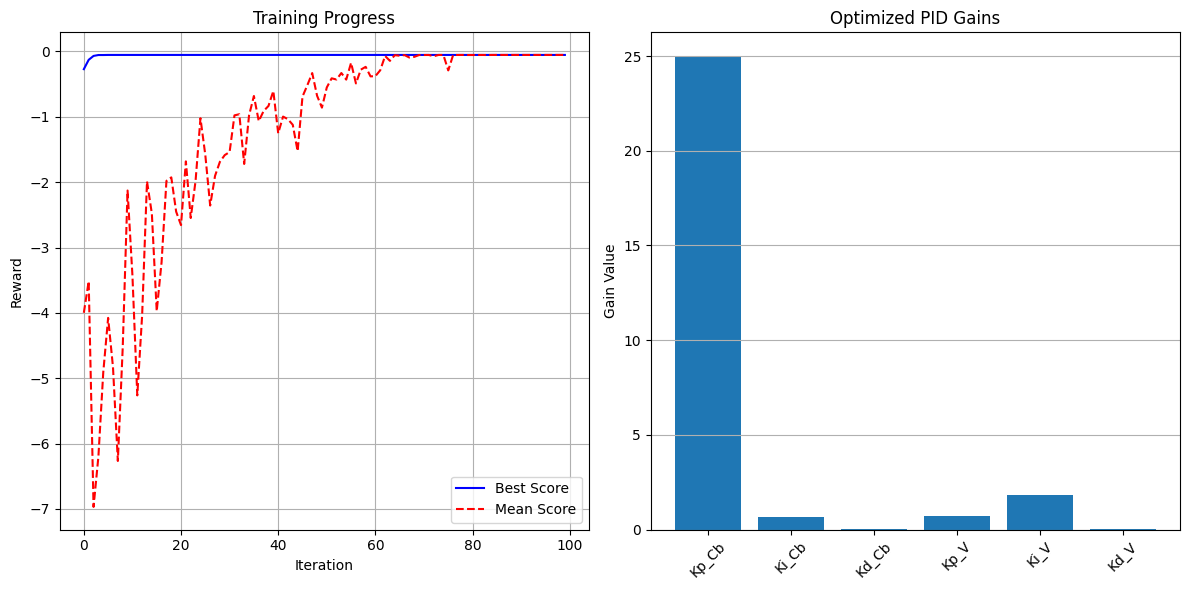

Starting fine-tuning process...
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to

/tmp/ipykernel_2846167/1609787999.py:455: RuntimeWarning: invalid value encountered in scalar divide
  v_improvement = ((baseline_mse_v - best_mse_v) / baseline_mse_v) * 100


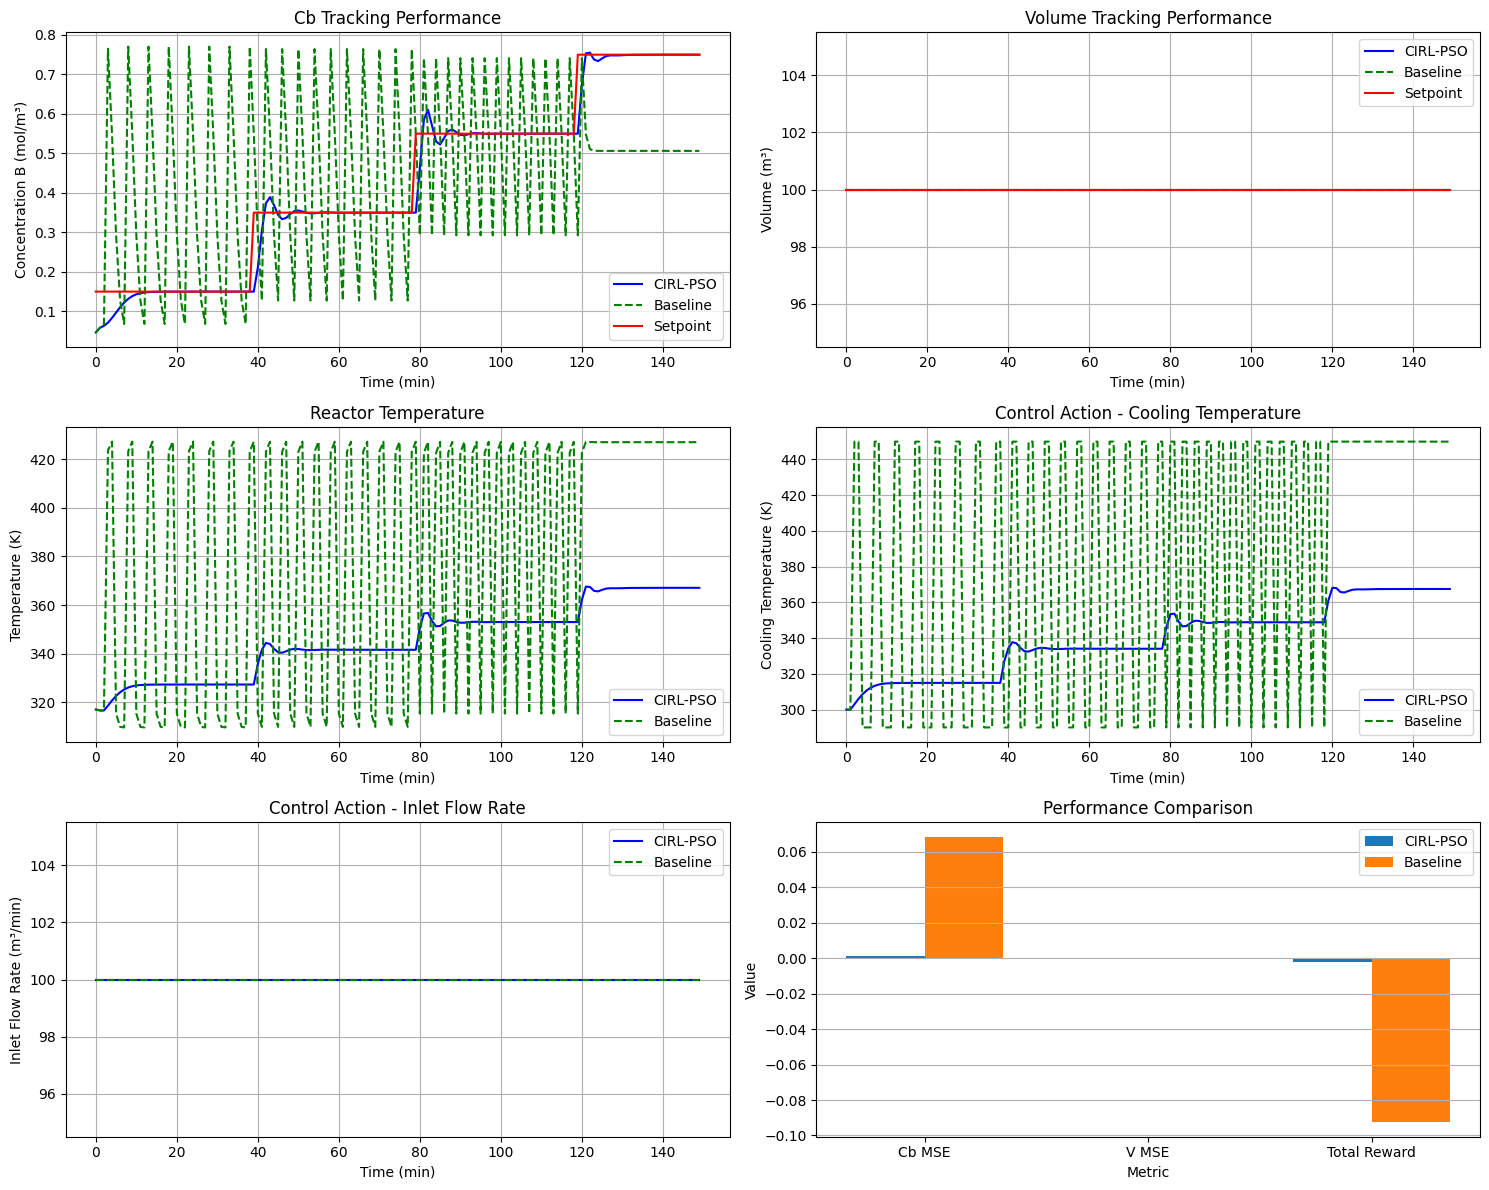

Evaluating policy...
Changing setpoint at step 39 to Cb=0.35, V=100.0
Changing setpoint at step 79 to Cb=0.55, V=100.0
Changing setpoint at step 119 to Cb=0.75, V=100.0


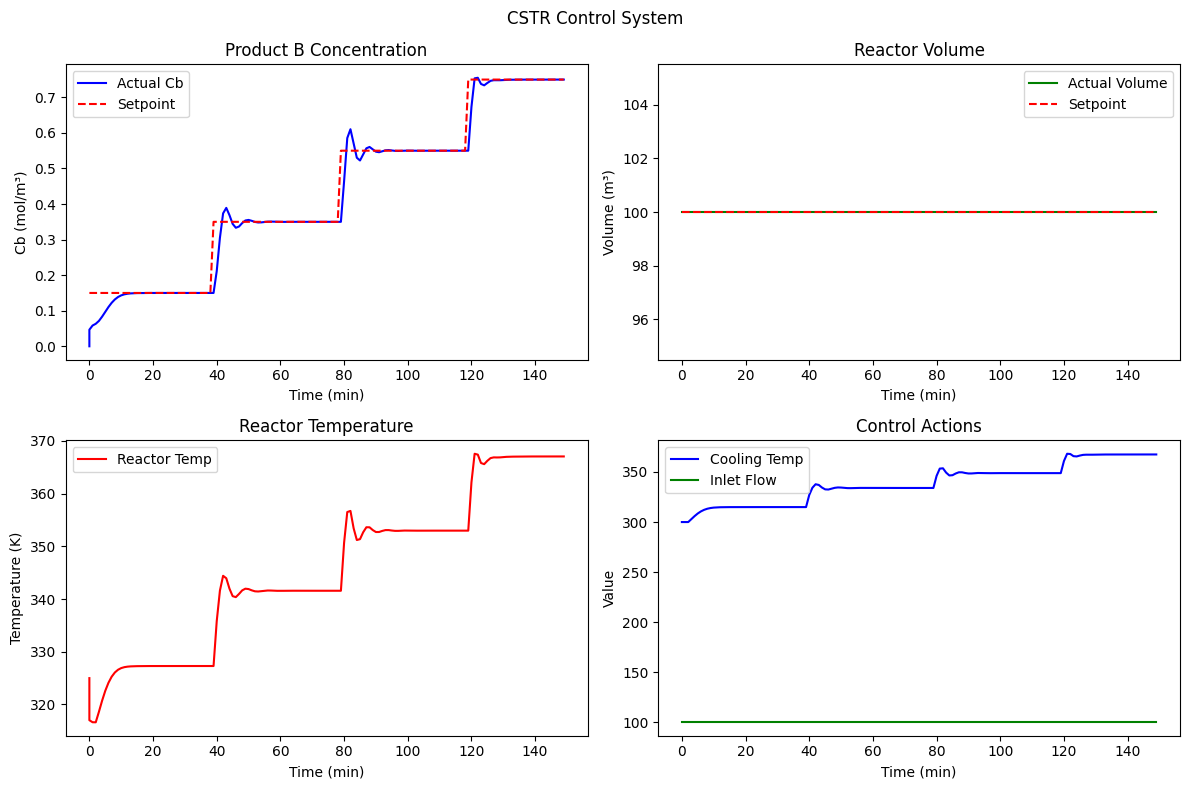

Evaluation completed. Total reward: -0.1871
CIRL-PSO Training and Evaluation Complete!
Best PID Gains: [2.50000000e+01 6.64441311e-01 2.00000000e-02 7.21546058e-01
 1.81358662e+00 1.00000000e-02]
Fine-tuned PID Gains: [2.50000000e+01 6.97207022e-01 2.00000000e-02 8.18178933e-01
 1.91133342e+00 1.00000000e-02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from CSTR_model_plus import CSTRRLEnv
import time
from tqdm import tqdm

class PSOParticle:
    """
    Represents a single particle in the PSO algorithm.
    Each particle corresponds to a policy that outputs PID gains.
    """
    def __init__(self, dim, bounds):
        """
        Initialize a particle with random position and zero velocity.
        
        Args:
            dim: Dimensionality of the search space (number of policy parameters)
            bounds: List of tuples (min, max) for each dimension
        """
        # Initialize position randomly within bounds
        self.position = np.array([np.random.uniform(bounds[i][0], bounds[i][1]) for i in range(dim)])
        self.velocity = np.zeros(dim)
        self.best_position = self.position.copy()
        self.best_score = -np.inf  # We maximize reward, so start with negative infinity

    def update_velocity(self, global_best_position, w=0.7, c1=1.5, c2=1.5):
        """
        Update the particle's velocity based on PSO equations.
        
        Args:
            global_best_position: The global best position across all particles
            w: Inertia weight
            c1: Cognitive parameter (personal best influence)
            c2: Social parameter (global best influence)
        """
        r1 = np.random.random(len(self.position))
        r2 = np.random.random(len(self.position))
        
        cognitive_component = c1 * r1 * (self.best_position - self.position)
        social_component = c2 * r2 * (global_best_position - self.position)
        
        self.velocity = w * self.velocity + cognitive_component + social_component

    def update_position(self, bounds):
        """
        Update the particle's position based on its velocity and enforce bounds.
        
        Args:
            bounds: List of tuples (min, max) for each dimension
        """
        self.position = self.position + self.velocity
        
        # Enforce bounds
        for i in range(len(self.position)):
            self.position[i] = np.clip(self.position[i], bounds[i][0], bounds[i][1])

    def evaluate(self, env, setpoints_Cb, setpoints_V, setpoint_durations):
        """
        Evaluate the particle by running an episode in the environment.
        The policy represented by this particle outputs PID gains.
        
        Args:
            env: The environment to evaluate on
            setpoints_Cb, setpoints_V, setpoint_durations: Setpoint tracking parameters
            
        Returns:
            total_reward: The total reward accumulated over the episode
        """
        # Reset environment with specific setpoint schedule
        options = {
            'setpoints_Cb': setpoints_Cb,
            'setpoints_V': setpoints_V,
            'setpoint_durations': setpoint_durations
        }
        obs, _ = env.reset(options=options)
        
        total_reward = 0
        done = False
        info = {}
        
        while not done:
            # The position of the particle represents the policy parameters
            # In PSO, we directly optimize the policy parameters (gains)
            action = self.position
            
            # Normalize action to [-1, 1] for the environment
            min_bounds = np.array([-5, 0, 0.02, 0, 0, 0.01])
            max_bounds = np.array([25, 20, 10, 1, 2, 1])
            normalized_action = 2 * ((action - min_bounds) / (max_bounds - min_bounds)) - 1
            
            # Clip to ensure within action bounds of environment
            normalized_action = np.clip(normalized_action, -1, 1)
            
            # Take a step in the environment
            obs, reward, done, truncated, info = env.step(normalized_action)
            total_reward += reward
            
            # Optional: Break early if the controller is performing extremely poorly
            if total_reward < -1000:
                return total_reward
            
        return total_reward


class CIRL_PSO:
    """
    CIRL (Continuous Iterative Reinforcement Learning) implementation using PSO
    for optimizing a control policy for setpoint tracking in a CSTR.
    """
    def __init__(self, env, num_particles=20, max_iterations=50):
        """
        Initialize the CIRL-PSO algorithm.
        
        Args:
            env: The environment to train on
            num_particles: Number of particles in the PSO swarm
            max_iterations: Maximum number of PSO iterations
        """
        self.env = env
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        
        # Dimensionality is 6 for the 6 PID gains
        self.dim = 6
        
        # Define bounds for the PID gains
        # [Kp_Cb, Ki_Cb, Kd_Cb, Kp_V, Ki_V, Kd_V]
        self.bounds = [
            (-5, 25),    # Kp_Cb
            (0, 20),     # Ki_Cb
            (0.02, 10),  # Kd_Cb
            (0, 1),      # Kp_V
            (0, 2),      # Ki_V
            (0.01, 1)    # Kd_V
        ]
        
        # Initialize particles
        self.particles = [PSOParticle(self.dim, self.bounds) for _ in range(num_particles)]
        
        # Initialize global best
        self.global_best_position = None
        self.global_best_score = -np.inf
        
        # For tracking training progress
        self.best_scores_history = []
        self.mean_scores_history = []

    def pretrain(self, historical_data=None):
        """
        Pretrain the policy using historical data if available.
        
        Args:
            historical_data: Dictionary containing historical PID gains, states, and rewards
        """
        if historical_data is None:
            print("No historical data available. Skipping pretraining.")
            return
        
        print("Pretraining using historical data...")
        
        # Here you would extract information from historical data to initialize particles
        # For example, initialize some particles near historically good parameter values
        
        # Simple implementation: set one particle to the best historical parameters
        if 'best_pid_gains' in historical_data:
            self.particles[0].position = historical_data['best_pid_gains']
            
            # Evaluate this particle
            reward = self.particles[0].evaluate(
                self.env, 
                historical_data.get('setpoints_Cb'), 
                historical_data.get('setpoints_V'),
                historical_data.get('setpoint_durations')
            )
            
            self.particles[0].best_score = reward
            self.particles[0].best_position = self.particles[0].position.copy()
            
            if reward > self.global_best_score:
                self.global_best_score = reward
                self.global_best_position = self.particles[0].position.copy()
                
            print(f"Pretrained with historical best PID gains. Reward: {reward}")

    def train(self, setpoints_Cb, setpoints_V, setpoint_durations):
        """
        Train the policy using PSO on the given setpoint tracking problem.
        
        Args:
            setpoints_Cb: List of setpoints for Cb concentration
            setpoints_V: List of setpoints for reactor volume
            setpoint_durations: List of durations for each setpoint
            
        Returns:
            best_policy: The best policy parameters found
            training_history: Dictionary containing training metrics
        """
        print("Starting CIRL-PSO training...")
        start_time = time.time()
        
        # Main PSO loop
        for iteration in tqdm(range(self.max_iterations)):
            iteration_scores = []
            
            # Evaluate each particle
            for particle in self.particles:
                # Evaluate the particle
                score = particle.evaluate(self.env, setpoints_Cb, setpoints_V, setpoint_durations)
                iteration_scores.append(score)
                
                # Update particle's best known position
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                
                # Update global best if needed
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()
            
            # Update velocities and positions
            for particle in self.particles:
                # Adaptive parameters: reduce exploration over time
                w = 0.9 - (0.5 * iteration / self.max_iterations)
                c1 = 2.0 - (0.5 * iteration / self.max_iterations)
                c2 = 2.0 + (0.5 * iteration / self.max_iterations)
                
                particle.update_velocity(self.global_best_position, w, c1, c2)
                particle.update_position(self.bounds)
            
            # Track statistics
            mean_score = np.mean(iteration_scores)
            self.mean_scores_history.append(mean_score)
            self.best_scores_history.append(self.global_best_score)
            
            # Print progress
            if (iteration + 1) % 5 == 0 or iteration == 0:
                print(f"Iteration {iteration+1}/{self.max_iterations}: "
                      f"Best Score = {self.global_best_score:.4f}, "
                      f"Mean Score = {mean_score:.4f}")
        
        training_time = time.time() - start_time
        print(f"Training completed in {training_time:.2f} seconds")
        print(f"Best policy found with score: {self.global_best_score:.4f}")
        
        # Normalize best policy to [-1, 1] for environment compatibility
        min_bounds = np.array([self.bounds[i][0] for i in range(self.dim)])
        max_bounds = np.array([self.bounds[i][1] for i in range(self.dim)])
        normalized_best_policy = 2 * ((self.global_best_position - min_bounds) / (max_bounds - min_bounds)) - 1
        
        training_history = {
            'best_scores': self.best_scores_history,
            'mean_scores': self.mean_scores_history,
            'best_pid_gains': self.global_best_position,
            'normalized_best_policy': normalized_best_policy,
            'training_time': training_time
        }
        
        return self.global_best_position, training_history

    def fine_tune(self, policy, setpoints_Cb, setpoints_V, setpoint_durations, iterations=10):
        """
        Fine-tune a policy on a new setpoint schedule.
        
        Args:
            policy: Initial policy parameters to fine-tune
            setpoints_Cb, setpoints_V, setpoint_durations: New setpoint schedule
            iterations: Number of fine-tuning iterations
            
        Returns:
            fine_tuned_policy: The fine-tuned policy parameters
            fine_tuning_history: Dictionary containing fine-tuning metrics
        """
        print("Starting fine-tuning process...")
        
        # Initialize the best particle with the given policy
        best_particle = PSOParticle(self.dim, self.bounds)
        best_particle.position = policy.copy()
        
        # Initialize the rest of the particles with small random perturbations
        particles = [best_particle]
        for _ in range(self.num_particles - 1):
            particle = PSOParticle(self.dim, self.bounds)
            # Initialize close to the best policy with some noise
            noise = np.random.normal(0, 0.1, self.dim)
            particle.position = np.clip(policy + noise, 
                                       [self.bounds[i][0] for i in range(self.dim)],
                                       [self.bounds[i][1] for i in range(self.dim)])
            particles.append(particle)
            
        # Initialize global best
        global_best_position = policy.copy()
        global_best_score = -np.inf
        
        # For tracking fine-tuning progress
        best_scores_history = []
        mean_scores_history = []
        
        # Fine-tuning loop
        for iteration in range(iterations):
            iteration_scores = []
            
            # Evaluate each particle
            for particle in particles:
                score = particle.evaluate(self.env, setpoints_Cb, setpoints_V, setpoint_durations)
                iteration_scores.append(score)
                
                # Update particle's best
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                
                # Update global best
                if score > global_best_score:
                    global_best_score = score
                    global_best_position = particle.position.copy()
            
            # Update particles
            for particle in particles:
                # Use larger cognitive parameter for fine-tuning
                particle.update_velocity(global_best_position, w=0.4, c1=2.0, c2=1.0)
                particle.update_position(self.bounds)
            
            # Track statistics
            mean_score = np.mean(iteration_scores)
            mean_scores_history.append(mean_score)
            best_scores_history.append(global_best_score)
            
            print(f"Fine-tuning iteration {iteration+1}/{iterations}: "
                  f"Best Score = {global_best_score:.4f}, "
                  f"Mean Score = {mean_score:.4f}")
        
        fine_tuning_history = {
            'best_scores': best_scores_history,
            'mean_scores': mean_scores_history,
            'fine_tuned_pid_gains': global_best_position
        }
        
        return global_best_position, fine_tuning_history

    def evaluate_policy(self, policy, setpoints_Cb, setpoints_V, setpoint_durations, render=False):
        """
        Evaluate a policy on a specific setpoint tracking problem.
        
        Args:
            policy: Policy parameters to evaluate
            setpoints_Cb, setpoints_V, setpoint_durations: Setpoint schedule
            render: Whether to render the environment during evaluation
            
        Returns:
            evaluation_data: Dictionary containing evaluation metrics and trajectories
        """
        print("Evaluating policy...")
        
        # Reset environment with the specific setpoint schedule
        options = {
            'setpoints_Cb': setpoints_Cb,
            'setpoints_V': setpoints_V,
            'setpoint_durations': setpoint_durations
        }
        obs, _ = self.env.reset(options=options)
        
        total_reward = 0
        done = False
        
        # For tracking trajectories
        times = []
        cb_values = []
        v_values = []
        t_values = []
        cb_setpoints = []
        v_setpoints = []
        tc_values = []
        fin_values = []
        pid_gains_history = []
        
        step = 0
        
        while not done:
            # Convert raw policy parameters to normalized action
            min_bounds = np.array([self.bounds[i][0] for i in range(self.dim)])
            max_bounds = np.array([self.bounds[i][1] for i in range(self.dim)])
            normalized_action = 2 * ((policy - min_bounds) / (max_bounds - min_bounds)) - 1
            normalized_action = np.clip(normalized_action, -1, 1)
            
            # Take a step in the environment
            obs, reward, done, truncated, info = self.env.step(normalized_action)
            total_reward += reward
            
            # Track data
            times.append(step * self.env.dt)
            cb_values.append(info["true_state"][1])
            v_values.append(info["true_state"][4])
            t_values.append(info["true_state"][3])
            cb_setpoints.append(info["setpoint_Cb"])
            v_setpoints.append(info["setpoint_V"])
            tc_values.append(info["control_action"][0])
            fin_values.append(info["control_action"][1])
            pid_gains_history.append(info["pid_gains"])
            
            step += 1
            
            # Render if requested
            if render and step % 5 == 0:
                self.env.render()
        
        if render:
            plt.pause(2)  # Pause to show the final state
        
        evaluation_data = {
            'total_reward': total_reward,
            'times': times,
            'cb_values': cb_values,
            'v_values': v_values,
            't_values': t_values,
            'cb_setpoints': cb_setpoints,
            'v_setpoints': v_setpoints,
            'tc_values': tc_values,
            'fin_values': fin_values,
            'pid_gains_history': pid_gains_history
        }
        
        print(f"Evaluation completed. Total reward: {total_reward:.4f}")
        return evaluation_data

    def compare_with_baseline(self, best_policy, baseline_policy, setpoints_Cb, setpoints_V, setpoint_durations):
        """
        Compare the performance of the best policy against a baseline policy.
        
        Args:
            best_policy: The best policy parameters from training
            baseline_policy: A baseline policy for comparison (e.g., a static PID controller)
            setpoints_Cb, setpoints_V, setpoint_durations: Setpoint schedule
            
        Returns:
            comparison_data: Dictionary containing comparison metrics
        """
        print("Comparing with baseline policy...")
        
        # Evaluate the best policy
        best_data = self.evaluate_policy(best_policy, setpoints_Cb, setpoints_V, setpoint_durations)
        
        # Evaluate the baseline policy
        baseline_data = self.evaluate_policy(baseline_policy, setpoints_Cb, setpoints_V, setpoint_durations)
        
        # Calculate performance metrics
        best_mse_cb = np.mean([(b - s)**2 for b, s in zip(best_data['cb_values'], best_data['cb_setpoints'])])
        baseline_mse_cb = np.mean([(b - s)**2 for b, s in zip(baseline_data['cb_values'], baseline_data['cb_setpoints'])])
        
        best_mse_v = np.mean([(b - s)**2 for b, s in zip(best_data['v_values'], best_data['v_setpoints'])])
        baseline_mse_v = np.mean([(b - s)**2 for b, s in zip(baseline_data['v_values'], baseline_data['v_setpoints'])])
        
        # Improvement percentages
        cb_improvement = ((baseline_mse_cb - best_mse_cb) / baseline_mse_cb) * 100
        v_improvement = ((baseline_mse_v - best_mse_v) / baseline_mse_v) * 100
        reward_improvement = ((best_data['total_reward'] - baseline_data['total_reward']) / 
                             abs(baseline_data['total_reward'])) * 100
        
        comparison_data = {
            'best_policy_data': best_data,
            'baseline_policy_data': baseline_data,
            'best_mse_cb': best_mse_cb,
            'baseline_mse_cb': baseline_mse_cb,
            'best_mse_v': best_mse_v,
            'baseline_mse_v': baseline_mse_v,
            'cb_improvement': cb_improvement,
            'v_improvement': v_improvement,
            'reward_improvement': reward_improvement
        }
        
        print(f"Comparison results:")
        print(f"  Cb MSE - Best: {best_mse_cb:.6f}, Baseline: {baseline_mse_cb:.6f}, Improvement: {cb_improvement:.2f}%")
        print(f"   V MSE - Best: {best_mse_v:.6f}, Baseline: {baseline_mse_v:.6f}, Improvement: {v_improvement:.2f}%")
        print(f"Reward   - Best: {best_data['total_reward']:.2f}, Baseline: {baseline_data['total_reward']:.2f}, "
              f"Improvement: {reward_improvement:.2f}%")
        
        return comparison_data

    def plot_training_progress(self, training_history):
        """
        Plot the training progress over iterations.
        
        Args:
            training_history: Dictionary containing training metrics
        """
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(training_history['best_scores'], 'b-', label='Best Score')
        plt.plot(training_history['mean_scores'], 'r--', label='Mean Score')
        plt.xlabel('Iteration')
        plt.ylabel('Reward')
        plt.title('Training Progress')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(1, 2, 2)
        x = np.arange(len(training_history['best_pid_gains']))
        gain_names = ['Kp_Cb', 'Ki_Cb', 'Kd_Cb', 'Kp_V', 'Ki_V', 'Kd_V']
        plt.bar(x, training_history['best_pid_gains'], tick_label=gain_names)
        plt.ylabel('Gain Value')
        plt.title('Optimized PID Gains')
        plt.xticks(rotation=45)
        plt.grid(True, axis='y')
        
        plt.tight_layout()
        plt.show()

    def plot_comparison_results(self, comparison_data):
        """
        Plot the comparison between the best policy and the baseline.
        
        Args:
            comparison_data: Dictionary containing comparison metrics
        """
        best_data = comparison_data['best_policy_data']
        baseline_data = comparison_data['baseline_policy_data']
        
        plt.figure(figsize=(15, 12))
        
        # Plot Cb tracking
        plt.subplot(3, 2, 1)
        plt.plot(best_data['times'], best_data['cb_values'], 'b-', label='CIRL-PSO')
        plt.plot(baseline_data['times'], baseline_data['cb_values'], 'g--', label='Baseline')
        plt.plot(best_data['times'], best_data['cb_setpoints'], 'r-', label='Setpoint')
        plt.xlabel('Time (min)')
        plt.ylabel('Concentration B (mol/m³)')
        plt.title('Cb Tracking Performance')
        plt.legend()
        plt.grid(True)
        
        # Plot Volume tracking
        plt.subplot(3, 2, 2)
        plt.plot(best_data['times'], best_data['v_values'], 'b-', label='CIRL-PSO')
        plt.plot(baseline_data['times'], baseline_data['v_values'], 'g--', label='Baseline')
        plt.plot(best_data['times'], best_data['v_setpoints'], 'r-', label='Setpoint')
        plt.xlabel('Time (min)')
        plt.ylabel('Volume (m³)')
        plt.title('Volume Tracking Performance')
        plt.legend()
        plt.grid(True)
        
        # Plot Temperature
        plt.subplot(3, 2, 3)
        plt.plot(best_data['times'], best_data['t_values'], 'b-', label='CIRL-PSO')
        plt.plot(baseline_data['times'], baseline_data['t_values'], 'g--', label='Baseline')
        plt.xlabel('Time (min)')
        plt.ylabel('Temperature (K)')
        plt.title('Reactor Temperature')
        plt.legend()
        plt.grid(True)
        
        # Plot Control actions - Cooling temperature
        plt.subplot(3, 2, 4)
        plt.plot(best_data['times'], best_data['tc_values'], 'b-', label='CIRL-PSO')
        plt.plot(baseline_data['times'], baseline_data['tc_values'], 'g--', label='Baseline')
        plt.xlabel('Time (min)')
        plt.ylabel('Cooling Temperature (K)')
        plt.title('Control Action - Cooling Temperature')
        plt.legend()
        plt.grid(True)
        
        # Plot Control actions - Inlet flow
        plt.subplot(3, 2, 5)
        plt.plot(best_data['times'], best_data['fin_values'], 'b-', label='CIRL-PSO')
        plt.plot(baseline_data['times'], baseline_data['fin_values'], 'g--', label='Baseline')
        plt.xlabel('Time (min)')
        plt.ylabel('Inlet Flow Rate (m³/min)')
        plt.title('Control Action - Inlet Flow Rate')
        plt.legend()
        plt.grid(True)
        
        # Plot MSE Comparison
        plt.subplot(3, 2, 6)
        metrics = ['Cb MSE', 'V MSE', 'Total Reward']
        best_metrics = [comparison_data['best_mse_cb'], 
                       comparison_data['best_mse_v'], 
                       best_data['total_reward']/100]
        baseline_metrics = [comparison_data['baseline_mse_cb'], 
                           comparison_data['baseline_mse_v'], 
                           baseline_data['total_reward']/100]
        
        x = np.arange(len(metrics))
        width = 0.35
        
        plt.bar(x - width/2, best_metrics, width, label='CIRL-PSO')
        plt.bar(x + width/2, baseline_metrics, width, label='Baseline')
        plt.xlabel('Metric')
        plt.ylabel('Value')
        plt.title('Performance Comparison')
        plt.xticks(x, metrics)
        plt.legend()
        plt.grid(True, axis='y')
        
        plt.tight_layout()
        plt.show()


def main():
    # Create the CSTR environment
    env = CSTRRLEnv(
        simulation_steps=150,        # Length of each episode
        dt=1.0,                      # Time step (min)
        uncertainty_level=0.0,       # Parameter uncertainty
        noise_level=0.0,             # Measurement noise
        actuator_delay_steps=0,      # Control delay
        transport_delay_steps=0,     # Measurement delay
        enable_disturbances=False    # Enable random disturbances
    )
    
    # Define the setpoint tracking problem for training
    # Training scenario: Step changes in Cb with constant volume
    training_setpoints_Cb = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    training_setpoints_V = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
    training_setpoint_durations = [40, 40, 40, 40, 40, 40, 40, 40, 40]
    
    # Initialize the CIRL-PSO trainer
    cirl_trainer = CIRL_PSO(env, num_particles=50, max_iterations=100)
    
    # Optional: Pretrain using historical data if available
    historical_data = {
        'best_pid_gains': np.array([1, -1, -0.62345996, -0.62057259, -0.09185304, -0.98460411]),  # Example values
        'setpoints_Cb': training_setpoints_Cb,
        'setpoints_V': training_setpoints_V,
        'setpoint_durations': training_setpoint_durations
    }
    cirl_trainer.pretrain(historical_data)
    
    # Train the policy
    best_policy, training_history = cirl_trainer.train(
        training_setpoints_Cb, 
        training_setpoints_V, 
        training_setpoint_durations
    )
    
    # Plot training progress
    cirl_trainer.plot_training_progress(training_history)
    
    # Define a new setpoint tracking problem for fine-tuning and evaluation
    # Testing scenario: Different setpoint profile
    testing_setpoints_Cb = [0.15, 0.35, 0.55, 0.75, 0.95]
    testing_setpoints_V = [100.0, 100.0, 100.0, 100.0, 100.0]
    testing_setpoint_durations = [40, 40, 40, 40, 40]
    
    # Fine-tune the policy on the new setpoint schedule
    fine_tuned_policy, fine_tuning_history = cirl_trainer.fine_tune(
        best_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations,
        iterations=10
    )
    
    # Define a baseline policy (static PID tuning)
    baseline_policy = np.array([1, -1, -0.62345996, -0.62057259, -0.09185304, -0.98460411])  # Example static PID gains
    
    # Compare with baseline
    comparison_data = cirl_trainer.compare_with_baseline(
        fine_tuned_policy, 
        baseline_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations
    )
    
    # Plot comparison results
    cirl_trainer.plot_comparison_results(comparison_data)
    
    # Visualize the final policy in action
    evaluation_data = cirl_trainer.evaluate_policy(
        fine_tuned_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations,
        render=True
    )
    
    # Close the environment
    env.close()
    
    print("CIRL-PSO Training and Evaluation Complete!")
    print(f"Best PID Gains: {best_policy}")
    print(f"Fine-tuned PID Gains: {fine_tuned_policy}")


if __name__ == "__main__":
    main()

Pretraining using historical data...
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Pretrained with historical best PID gains. Reward: -34.0261851892868
Starting CIRL-PSO training...


  0%|          | 0/200 [00:00<?, ?it/s]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

  0%|          | 1/200 [00:09<31:59,  9.65s/it]

Iteration 1/200: Best Score = -0.7480, Mean Score = -34.5181
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

  1%|          | 2/200 [00:21<35:32, 10.77s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

  2%|▏         | 3/200 [00:38<45:13, 13.77s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

  2%|▏         | 4/200 [00:53<47:00, 14.39s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

  2%|▎         | 5/200 [01:06<45:14, 13.92s/it]

Iteration 5/200: Best Score = -0.3556, Mean Score = -16.9203
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

  3%|▎         | 6/200 [01:20<44:09, 13.66s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

  4%|▎         | 7/200 [01:31<41:23, 12.87s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

  4%|▍         | 8/200 [01:43<40:30, 12.66s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

  4%|▍         | 9/200 [01:54<38:25, 12.07s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

  5%|▌         | 10/200 [02:04<36:19, 11.47s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 10/200: Best Score = -0.3440, Mean Score = -7.7882
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpo

  6%|▌         | 11/200 [02:14<34:26, 10.94s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

  6%|▌         | 12/200 [02:24<33:34, 10.71s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

  6%|▋         | 13/200 [02:33<31:38, 10.15s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

  7%|▋         | 14/200 [02:41<30:04,  9.70s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

  8%|▊         | 15/200 [02:51<30:04,  9.75s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 15/200: Best Score = -0.3440, Mean Score = -8.3588
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

  8%|▊         | 16/200 [03:02<30:32,  9.96s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

  8%|▊         | 17/200 [03:11<29:36,  9.71s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

  9%|▉         | 18/200 [03:19<28:21,  9.35s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 10%|▉         | 19/200 [03:30<29:33,  9.80s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 10%|█         | 20/200 [03:41<30:06, 10.04s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 20/200: Best Score = -0.3440, Mean Score = -9.0853
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing set

 10%|█         | 21/200 [03:50<29:24,  9.86s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 11%|█         | 22/200 [03:59<28:30,  9.61s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 12%|█▏        | 23/200 [04:09<28:23,  9.62s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 12%|█▏        | 24/200 [04:19<28:37,  9.76s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 12%|█▎        | 25/200 [04:29<28:20,  9.72s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 25/200: Best Score = -0.3440, Mean Score = -6.1768
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

 13%|█▎        | 26/200 [04:38<27:53,  9.62s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 14%|█▎        | 27/200 [04:47<27:26,  9.52s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 14%|█▍        | 28/200 [04:57<27:08,  9.47s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 14%|█▍        | 29/200 [05:05<25:57,  9.11s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 15%|█▌        | 30/200 [05:13<25:08,  8.87s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 30/200: Best Score = -0.3440, Mean Score = -3.3198
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

 16%|█▌        | 31/200 [05:22<25:16,  8.98s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 16%|█▌        | 32/200 [05:31<25:08,  8.98s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 16%|█▋        | 33/200 [05:39<24:00,  8.63s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 17%|█▋        | 34/200 [05:47<23:23,  8.45s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 18%|█▊        | 35/200 [05:56<23:27,  8.53s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 35/200: Best Score = -0.3440, Mean Score = -4.3882
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

 18%|█▊        | 36/200 [06:04<23:17,  8.52s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 18%|█▊        | 37/200 [06:13<22:49,  8.40s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 19%|█▉        | 38/200 [06:22<23:06,  8.56s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 20%|█▉        | 39/200 [06:30<22:39,  8.44s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 20%|██        | 40/200 [06:38<22:15,  8.35s/it]

Iteration 40/200: Best Score = -0.3440, Mean Score = -2.8944
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

 20%|██        | 41/200 [06:46<21:34,  8.14s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 21%|██        | 42/200 [06:54<21:38,  8.22s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 22%|██▏       | 43/200 [07:02<21:41,  8.29s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 22%|██▏       | 44/200 [07:10<21:22,  8.22s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 22%|██▎       | 45/200 [07:18<20:47,  8.05s/it]

Iteration 45/200: Best Score = -0.3440, Mean Score = -1.6783
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

 23%|██▎       | 46/200 [07:26<20:35,  8.02s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 24%|██▎       | 47/200 [07:35<20:54,  8.20s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 24%|██▍       | 48/200 [07:43<20:34,  8.12s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 24%|██▍       | 49/200 [07:50<20:04,  7.98s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 25%|██▌       | 50/200 [07:59<20:17,  8.12s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 50/200: Best Score = -0.3440, Mean Score = -3.8604
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

 26%|██▌       | 51/200 [08:07<20:02,  8.07s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 26%|██▌       | 52/200 [08:14<19:35,  7.94s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 26%|██▋       | 53/200 [08:22<19:31,  7.97s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 27%|██▋       | 54/200 [08:30<19:33,  8.04s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 28%|██▊       | 55/200 [08:38<19:21,  8.01s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 55/200: Best Score = -0.3440, Mean Score = -2.1205
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

 28%|██▊       | 56/200 [08:46<19:04,  7.95s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 28%|██▊       | 57/200 [08:54<18:47,  7.88s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 29%|██▉       | 58/200 [09:02<19:05,  8.07s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 30%|██▉       | 59/200 [09:10<18:54,  8.05s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 30%|███       | 60/200 [09:19<19:06,  8.19s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 60/200: Best Score = -0.3440, Mean Score = -3.2816
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing set

 30%|███       | 61/200 [09:27<18:33,  8.01s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 31%|███       | 62/200 [09:34<17:56,  7.80s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 32%|███▏      | 63/200 [09:42<17:48,  7.80s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 32%|███▏      | 64/200 [09:50<17:50,  7.87s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 32%|███▎      | 65/200 [09:58<17:53,  7.95s/it]

Iteration 65/200: Best Score = -0.3440, Mean Score = -2.5981
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpo

 33%|███▎      | 66/200 [10:06<17:36,  7.88s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 34%|███▎      | 67/200 [10:13<17:27,  7.88s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 34%|███▍      | 68/200 [10:21<17:17,  7.86s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 34%|███▍      | 69/200 [10:29<17:19,  7.93s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 35%|███▌      | 70/200 [10:37<16:56,  7.82s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 70/200: Best Score = -0.3440, Mean Score = -1.3378
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing set

 36%|███▌      | 71/200 [10:44<16:31,  7.68s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 36%|███▌      | 72/200 [10:52<16:09,  7.57s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 36%|███▋      | 73/200 [11:00<16:18,  7.70s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 37%|███▋      | 74/200 [11:07<16:10,  7.70s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 38%|███▊      | 75/200 [11:15<15:58,  7.67s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 75/200: Best Score = -0.3440, Mean Score = -1.2212
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpo

 38%|███▊      | 76/200 [11:23<16:00,  7.75s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 38%|███▊      | 77/200 [11:31<16:02,  7.83s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 39%|███▉      | 78/200 [11:38<15:41,  7.72s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 40%|███▉      | 79/200 [11:46<15:24,  7.64s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 40%|████      | 80/200 [11:53<15:02,  7.52s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 80/200: Best Score = -0.3440, Mean Score = -0.5128
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setp

 40%|████      | 81/200 [12:01<14:56,  7.53s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 41%|████      | 82/200 [12:08<14:51,  7.55s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 42%|████▏     | 83/200 [12:16<14:41,  7.53s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 42%|████▏     | 84/200 [12:23<14:35,  7.55s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 42%|████▎     | 85/200 [12:31<14:23,  7.51s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 85/200: Best Score = -0.3440, Mean Score = -0.6539
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing set

 43%|████▎     | 86/200 [12:38<14:18,  7.53s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 44%|████▎     | 87/200 [12:46<14:11,  7.54s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 44%|████▍     | 88/200 [12:53<14:06,  7.56s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 44%|████▍     | 89/200 [13:01<13:54,  7.52s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 45%|████▌     | 90/200 [13:08<13:42,  7.47s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 90/200: Best Score = -0.3440, Mean Score = -0.5137
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setp

 46%|████▌     | 91/200 [13:15<13:28,  7.42s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 46%|████▌     | 92/200 [13:23<13:19,  7.40s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 46%|████▋     | 93/200 [13:30<13:09,  7.38s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 47%|████▋     | 94/200 [13:38<13:08,  7.44s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 48%|████▊     | 95/200 [13:45<12:57,  7.41s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 95/200: Best Score = -0.3440, Mean Score = -0.4287
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing set

 48%|████▊     | 96/200 [13:52<12:48,  7.38s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 48%|████▊     | 97/200 [14:00<12:38,  7.36s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 49%|████▉     | 98/200 [14:07<12:31,  7.37s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 50%|████▉     | 99/200 [14:14<12:22,  7.35s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 50%|█████     | 100/200 [14:22<12:14,  7.34s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 100/200: Best Score = -0.3440, Mean Score = -0.3628
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 50%|█████     | 101/200 [14:29<12:05,  7.33s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 51%|█████     | 102/200 [14:36<11:58,  7.33s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 52%|█████▏    | 103/200 [14:44<11:52,  7.34s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 52%|█████▏    | 104/200 [14:51<11:47,  7.37s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 52%|█████▎    | 105/200 [14:59<11:41,  7.38s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 105/200: Best Score = -0.3440, Mean Score = -0.3469
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing se

 53%|█████▎    | 106/200 [15:06<11:35,  7.40s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 54%|█████▎    | 107/200 [15:13<11:27,  7.39s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 54%|█████▍    | 108/200 [15:21<11:17,  7.37s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 55%|█████▍    | 109/200 [15:28<11:10,  7.37s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 55%|█████▌    | 110/200 [15:36<11:04,  7.38s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 110/200: Best Score = -0.3440, Mean Score = -0.3501
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing se

 56%|█████▌    | 111/200 [15:43<10:57,  7.39s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 56%|█████▌    | 112/200 [15:50<10:49,  7.38s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 56%|█████▋    | 113/200 [15:58<10:42,  7.39s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 57%|█████▋    | 114/200 [16:05<10:38,  7.42s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 57%|█████▊    | 115/200 [16:13<10:29,  7.41s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 115/200: Best Score = -0.3440, Mean Score = -0.3531
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing set

 58%|█████▊    | 116/200 [16:20<10:21,  7.39s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 58%|█████▊    | 117/200 [16:27<10:13,  7.39s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 59%|█████▉    | 118/200 [16:35<10:07,  7.40s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 60%|█████▉    | 119/200 [16:42<09:58,  7.39s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 60%|██████    | 120/200 [16:49<09:50,  7.38s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 120/200: Best Score = -0.3440, Mean Score = -0.3492
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 60%|██████    | 121/200 [16:57<09:42,  7.38s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 61%|██████    | 122/200 [17:04<09:38,  7.42s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 62%|██████▏   | 123/200 [17:12<09:29,  7.40s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 62%|██████▏   | 124/200 [17:19<09:21,  7.39s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 62%|██████▎   | 125/200 [17:26<09:13,  7.38s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 125/200: Best Score = -0.3440, Mean Score = -0.4325
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setp

 63%|██████▎   | 126/200 [17:34<09:05,  7.37s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 64%|██████▎   | 127/200 [17:41<08:57,  7.37s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 64%|██████▍   | 128/200 [17:48<08:50,  7.36s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 64%|██████▍   | 129/200 [17:56<08:41,  7.35s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 65%|██████▌   | 130/200 [18:03<08:36,  7.38s/it]

Iteration 130/200: Best Score = -0.3440, Mean Score = -0.4456
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 66%|██████▌   | 131/200 [18:11<08:30,  7.40s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 66%|██████▌   | 132/200 [18:18<08:23,  7.41s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 66%|██████▋   | 133/200 [18:25<08:15,  7.39s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 67%|██████▋   | 134/200 [18:33<08:12,  7.46s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 68%|██████▊   | 135/200 [18:40<08:03,  7.43s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 135/200: Best Score = -0.3440, Mean Score = -0.3461
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setp

 68%|██████▊   | 136/200 [18:48<07:54,  7.42s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 68%|██████▊   | 137/200 [18:55<07:45,  7.39s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 69%|██████▉   | 138/200 [19:03<07:38,  7.40s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 70%|██████▉   | 139/200 [19:10<07:31,  7.41s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 70%|███████   | 140/200 [19:17<07:23,  7.40s/it]

Iteration 140/200: Best Score = -0.3440, Mean Score = -0.3444
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 70%|███████   | 141/200 [19:25<07:16,  7.40s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 71%|███████   | 142/200 [19:32<07:08,  7.38s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 72%|███████▏  | 143/200 [19:40<07:01,  7.39s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 72%|███████▏  | 144/200 [19:47<06:54,  7.39s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 72%|███████▎  | 145/200 [19:54<06:46,  7.39s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 145/200: Best Score = -0.3440, Mean Score = -0.3474
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing set

 73%|███████▎  | 146/200 [20:02<06:38,  7.39s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 74%|███████▎  | 147/200 [20:09<06:31,  7.39s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 74%|███████▍  | 148/200 [20:16<06:23,  7.37s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 74%|███████▍  | 149/200 [20:24<06:16,  7.37s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 75%|███████▌  | 150/200 [20:31<06:08,  7.38s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 150/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setp

 76%|███████▌  | 151/200 [20:38<06:00,  7.35s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 76%|███████▌  | 152/200 [20:46<05:52,  7.34s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 76%|███████▋  | 153/200 [20:53<05:44,  7.33s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 77%|███████▋  | 154/200 [21:00<05:37,  7.33s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 78%|███████▊  | 155/200 [21:08<05:30,  7.35s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 155/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing set

 78%|███████▊  | 156/200 [21:15<05:23,  7.35s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 78%|███████▊  | 157/200 [21:23<05:16,  7.35s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 79%|███████▉  | 158/200 [21:30<05:07,  7.33s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 80%|███████▉  | 159/200 [21:37<05:00,  7.32s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 80%|████████  | 160/200 [21:44<04:52,  7.32s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 160/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 80%|████████  | 161/200 [21:52<04:44,  7.31s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 81%|████████  | 162/200 [21:59<04:37,  7.31s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 82%|████████▏ | 163/200 [22:06<04:31,  7.33s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 82%|████████▏ | 164/200 [22:14<04:23,  7.33s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 82%|████████▎ | 165/200 [22:21<04:16,  7.33s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 165/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing se

 83%|████████▎ | 166/200 [22:28<04:09,  7.32s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 84%|████████▎ | 167/200 [22:36<04:01,  7.32s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 84%|████████▍ | 168/200 [22:43<03:54,  7.32s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 84%|████████▍ | 169/200 [22:50<03:47,  7.32s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 85%|████████▌ | 170/200 [22:58<03:39,  7.32s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 170/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing se

 86%|████████▌ | 171/200 [23:05<03:32,  7.34s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 86%|████████▌ | 172/200 [23:12<03:24,  7.31s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 86%|████████▋ | 173/200 [23:20<03:17,  7.31s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 87%|████████▋ | 174/200 [23:27<03:10,  7.31s/it]

Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at ste

 88%|████████▊ | 175/200 [23:34<03:02,  7.30s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 88%|████████▊ | 176/200 [23:41<02:55,  7.30s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 88%|████████▊ | 177/200 [23:49<02:48,  7.31s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 89%|████████▉ | 178/200 [23:56<02:40,  7.31s/it]

Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step

 90%|████████▉ | 179/200 [24:03<02:33,  7.33s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 90%|█████████ | 180/200 [24:11<02:26,  7.34s/it]

Iteration 180/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 90%|█████████ | 181/200 [24:18<02:20,  7.42s/it]

Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 

 91%|█████████ | 182/200 [24:26<02:14,  7.47s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 92%|█████████▏| 183/200 [24:33<02:06,  7.43s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 92%|█████████▏| 184/200 [24:41<01:58,  7.39s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 92%|█████████▎| 185/200 [24:48<01:50,  7.38s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 185/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 93%|█████████▎| 186/200 [24:55<01:42,  7.34s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 

 94%|█████████▎| 187/200 [25:03<01:35,  7.35s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 94%|█████████▍| 188/200 [25:10<01:28,  7.35s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 94%|█████████▍| 189/200 [25:17<01:20,  7.33s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 95%|█████████▌| 190/200 [25:25<01:13,  7.33s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 190/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 96%|█████████▌| 191/200 [25:32<01:06,  7.34s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 96%|█████████▌| 192/200 [25:39<00:58,  7.33s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 96%|█████████▋| 193/200 [25:46<00:50,  7.28s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

 97%|█████████▋| 194/200 [25:54<00:43,  7.29s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 

 98%|█████████▊| 195/200 [26:01<00:36,  7.27s/it]

Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 195/200: Best Score = -0.3440, Mean Score = -0.3440
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setp

 98%|█████████▊| 196/200 [26:08<00:28,  7.24s/it]

Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at ste

 98%|█████████▊| 197/200 [26:15<00:21,  7.26s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

 99%|█████████▉| 198/200 [26:23<00:14,  7.29s/it]

Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step

100%|█████████▉| 199/200 [26:30<00:07,  7.29s/it]

Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at ste

100%|██████████| 200/200 [26:37<00:00,  7.99s/it]

Changing setpoint at step 399 to Cb=0.9, V=100.0
Changing setpoint at step 49 to Cb=0.2, V=100.0
Changing setpoint at step 99 to Cb=0.3, V=100.0
Changing setpoint at step 149 to Cb=0.4, V=100.0
Changing setpoint at step 199 to Cb=0.5, V=100.0
Changing setpoint at step 249 to Cb=0.6, V=100.0
Changing setpoint at step 299 to Cb=0.7, V=100.0
Changing setpoint at step 349 to Cb=0.8, V=100.0
Changing setpoint at step 399 to Cb=0.9, V=100.0
Iteration 200/200: Best Score = -0.3440, Mean Score = -0.3440
Training completed in 1597.92 seconds
Best policy found with score: -0.3440


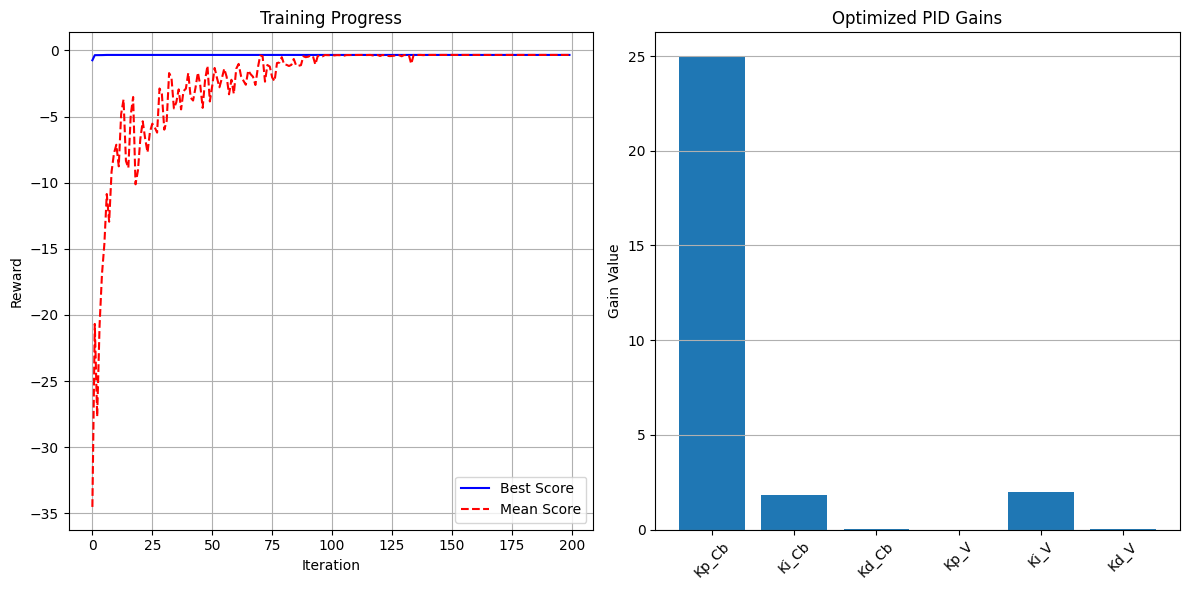

Starting fine-tuning process...
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to

/tmp/ipykernel_2846167/1609787999.py:455: RuntimeWarning: invalid value encountered in scalar divide
  v_improvement = ((baseline_mse_v - best_mse_v) / baseline_mse_v) * 100


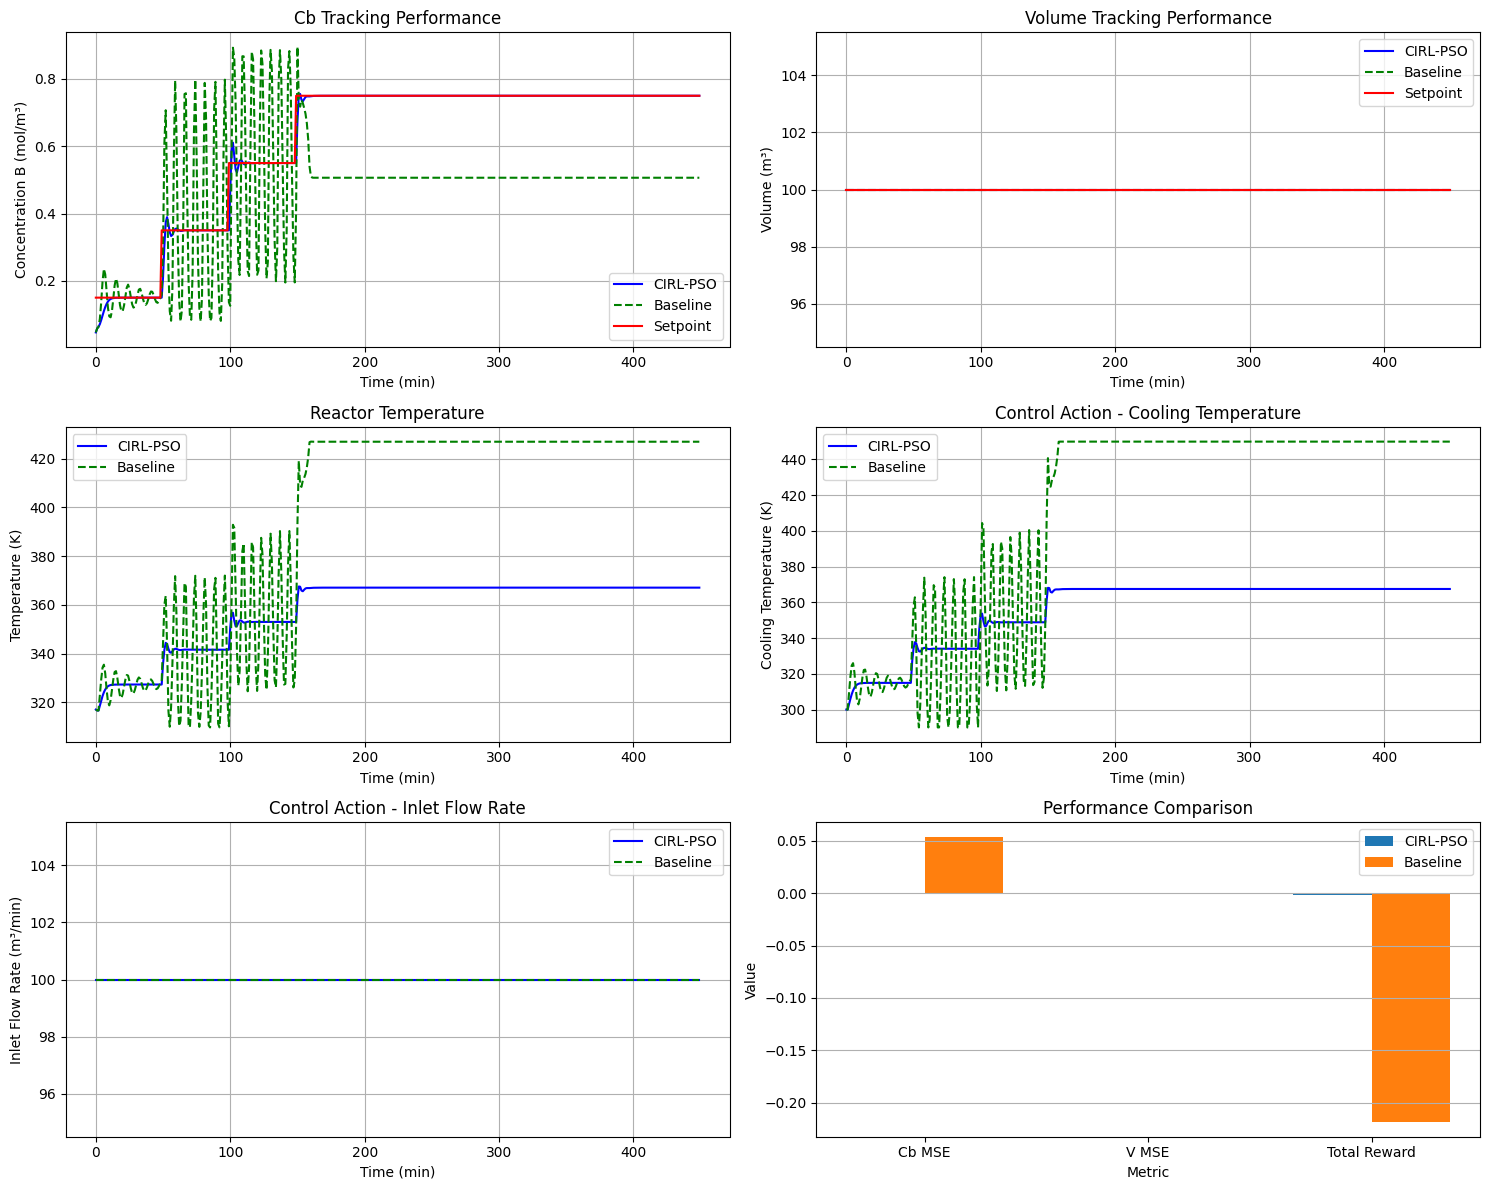

Evaluating policy...
Changing setpoint at step 49 to Cb=0.35, V=100.0
Changing setpoint at step 99 to Cb=0.55, V=100.0
Changing setpoint at step 149 to Cb=0.75, V=100.0


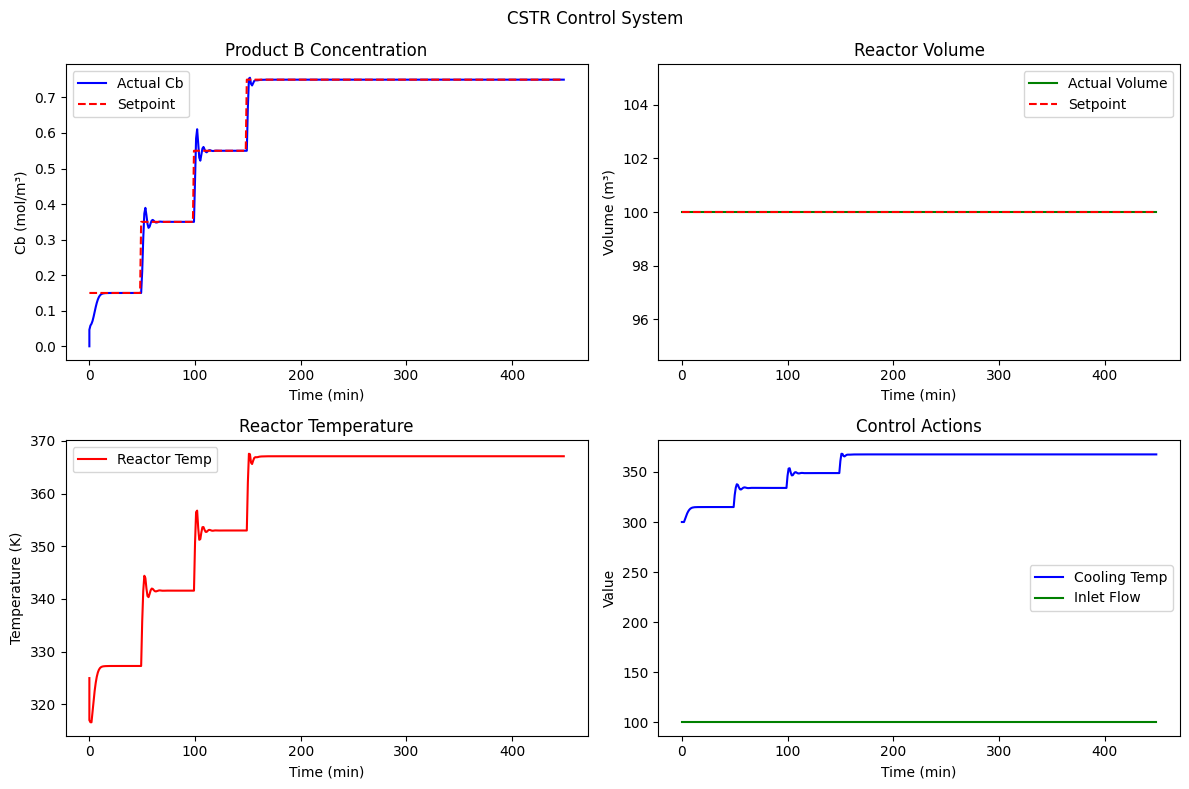

Evaluation completed. Total reward: -0.1877
CIRL-PSO Training and Evaluation Complete!
Best PID Gains: [2.50000000e+01 1.83926933e+00 2.00000000e-02 0.00000000e+00
 2.00000000e+00 1.00000000e-02]
Fine-tuned PID Gains: [2.49503798e+01 6.97915495e-01 3.17815070e-02 5.69346794e-02
 2.00000000e+00 2.04490394e-02]


In [7]:
def main():
    # Create the CSTR environment
    env = CSTRRLEnv(
        simulation_steps=450,        # Length of each episode
        dt=1.0,                      # Time step (min)
        uncertainty_level=0.0,       # Parameter uncertainty
        noise_level=0.0,             # Measurement noise
        actuator_delay_steps=0,      # Control delay
        transport_delay_steps=0,     # Measurement delay
        enable_disturbances=False    # Enable random disturbances
    )
    
    # Define the setpoint tracking problem for training
    # Training scenario: Step changes in Cb with constant volume
    training_setpoints_Cb = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    training_setpoints_V = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
    # training_setpoint_durations = [10, 10, 10, 10, 10, 10, 10, 10, 10]
    training_setpoint_durations = [50, 50, 50, 50, 50, 50, 50, 50, 50]
    
    # Initialize the CIRL-PSO trainer
    cirl_trainer = CIRL_PSO(env, num_particles=50, max_iterations=200)
    
    # Optional: Pretrain using historical data if available
    historical_data = {
        'best_pid_gains': np.array([1, -1, -0.62345996, -0.62057259, -0.09185304, -0.98460411]),  # Example values
        'setpoints_Cb': training_setpoints_Cb,
        'setpoints_V': training_setpoints_V,
        'setpoint_durations': training_setpoint_durations
    }
    cirl_trainer.pretrain(historical_data)
    
    # Train the policy
    best_policy, training_history = cirl_trainer.train(
        training_setpoints_Cb, 
        training_setpoints_V, 
        training_setpoint_durations
    )
    
    # Plot training progress
    cirl_trainer.plot_training_progress(training_history)
    
    # Define a new setpoint tracking problem for fine-tuning and evaluation
    # Testing scenario: Different setpoint profile
    testing_setpoints_Cb = [0.15, 0.35, 0.55, 0.75]
    testing_setpoints_V = [100.0, 100.0, 100.0, 100.0]
    # testing_setpoint_durations = [10, 10, 10, 10]
    testing_setpoint_durations = [50, 50, 50, 50]
    # Fine-tune the policy on the new setpoint schedule
    fine_tuned_policy, fine_tuning_history = cirl_trainer.fine_tune(
        best_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations,
        iterations=30
    )
    
    # Define a baseline policy (static PID tuning)
    baseline_policy = np.array([3.09, 0.03, 0.83, 0.84, 1.85, 0.08])  # best static pid
    
    # Compare with baseline
    comparison_data = cirl_trainer.compare_with_baseline(
        fine_tuned_policy, 
        baseline_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations
    )
    
    # Plot comparison results
    cirl_trainer.plot_comparison_results(comparison_data)
    
    # Visualize the final policy in action
    evaluation_data = cirl_trainer.evaluate_policy(
        fine_tuned_policy, 
        testing_setpoints_Cb, 
        testing_setpoints_V, 
        testing_setpoint_durations,
        render=True
    )
    
    # Close the environment
    env.close()
    
    print("CIRL-PSO Training and Evaluation Complete!")
    print(f"Best PID Gains: {best_policy}")
    print(f"Fine-tuned PID Gains: {fine_tuned_policy}")


if __name__ == "__main__":
    main()